# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [3]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [4]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [5]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


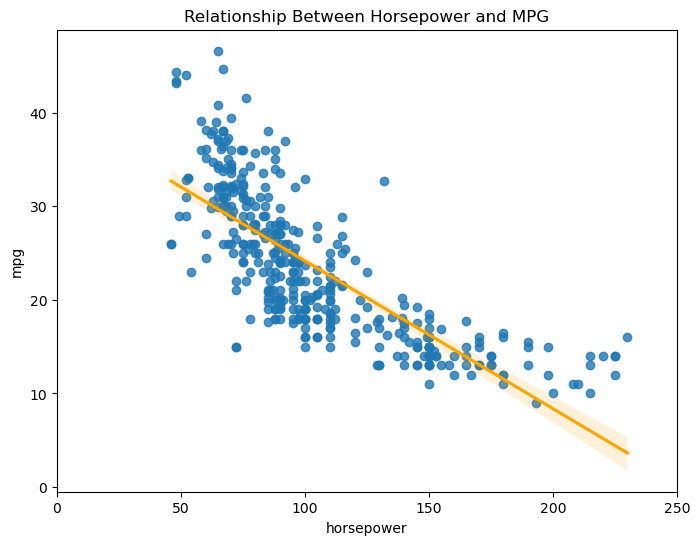

In [6]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- It is showing the relationship between RSS and slope, using derivative to find the minimum value. where RSS and slope or coeficient are minimum to find line of best fit.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- stepsize refers to the coeficient during each iteration of the optimazation process and determines how far the algorith moves in the direction of the lowest descent or loss function. Learning rate regulates this step size, it regulates the steps in gradient descent.
- Make the size of your step proportional to the value of the derivative at the point where you currently are in parameter space! If we're very far from the minimum, then our values will be large, and so we therefore ca safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the "learning rate"


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Classification.
- probability of odds of something beloging to a class or not
- outcome is continuos numeric in linear but its discrete in logistic.
- parametric model. Uses coeficient and it explains how variables affect certain outcome. 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- It helps us anlyze non numeric categorical variables. or binary
- predicting continuous values


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [7]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [8]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [11]:
# Train-test split
# Set test_size=0.33 and random_state=42
X= mpg_class.drop('target', axis=1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
mpg_class.target.value_counts()
print(mpg_class["target"].value_counts(normalize=True))

target
0    0.747449
1    0.252551
Name: proportion, dtype: float64


#### Answer:

- it's a  binary classification
- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 0.74 percent of being a class 0 and 0.25 percent of being 0.25


#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer


#### Answer:

- there is acuracy of 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- imbalanced
- Smote
- Regularization
- Ridge


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42).fit(X_train_sc, y_train)

In [ ]:
# Plot a confusion matrix on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, 


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [ ]:
# Accuracy


In [ ]:
# Precision


In [ ]:
# Recall


In [ ]:
# F1-Score


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [ ]:
# Calculate roc-auc


In [ ]:
# Plot the ROC curve


### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Pretty good


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [ ]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

In [ ]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [22]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

In [ ]:
# Plot a confusion matrix on the test data


In [ ]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 
